In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spy_engineered_v4.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df

,period_idx_prev_period,30m_period_idx,movement,movement_prev_period,chg_prev_period,chg,vpoc_prev_period,total_volume_prev_period,vpoc_price_prev_period,tpoc_price_prev_period,...,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period,trapped_at_extremes_volume_prev_period,relative_volume_to_930,relative_volume_prev_period,success
period,,,,,,,,,,,,,,,,,,,,,
2024-04-22 09:35:00,0,0,1,0,-0.1265,0.0080,0.247937,628143.0,497.88,497.74,...,8.560,78.235,1,0,0,0,0.000000,1.000000,1.000000,0
2024-04-22 09:40:00,1,0,1,1,0.0080,0.0080,0.085825,206035.0,497.23,497.24,...,1.170,1.209,0,1,0,0,0.000000,0.328007,0.328007,0
2024-04-22 09:45:00,2,0,1,1,0.0080,0.1287,0.075736,166394.0,497.11,497.00,...,1.646,2.898,0,1,1,0,0.905946,0.264898,0.807601,1
2024-04-22 09:50:00,3,0,0,1,0.1287,-0.0301,0.036437,159041.0,497.43,497.60,...,0.935,0.057,0,1,0,0,0.000000,0.253192,0.955810,0
2024-04-22 09:55:00,4,0,0,0,-0.0301,-0.0442,0.082666,129267.0,498.00,497.86,...,0.777,-0.466,1,0,0,0,0.000000,0.205792,0.812790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20 15:35:00,72,12,1,0,-0.0490,0.0245,0.071495,65711.0,530.08,530.09,...,1.076,0.523,1,0,0,0,0.000000,0.205030,1.401506,0
2024-05-20 15:40:00,73,12,0,1,0.0245,-0.0302,0.092448,71608.0,530.09,530.08,...,0.807,-0.565,0,1,0,0,0.000000,0.223429,1.089741,0
2024-05-20 15:45:00,74,12,0,0,-0.0302,-0.0509,0.132472,103969.0,529.96,530.00,...,1.525,2.680,0,1,0,0,0.000000,0.324401,1.451919,0


In [32]:
df.columns

Index(['period_idx_prev_period', '30m_period_idx', 'movement',
       'movement_prev_period', 'chg_prev_period', 'chg', 'vpoc_prev_period',
       'total_volume_prev_period', 'vpoc_price_prev_period',
       'tpoc_price_prev_period', 'open_prev_period', 'high_prev_period',
       'low_prev_period', 'close_prev_period', 'vpoc_tpoc_ratio_prev_period',
       'vpoc_open_ratio_prev_period', 'tpoc_open_ratio_prev_period',
       'vpoc_high_ratio_prev_period', 'tpoc_high_ratio_prev_period',
       'vpoc_low_ratio_prev_period', 'tpoc_low_ratio_prev_period',
       'vpoc_close_ratio_prev_period', 'tpoc_close_ratio_prev_period',
       'price_cv_prev_period', 'price_skew_prev_period',
       'price_kurt_prev_period', 'vol_price_cv_prev_period',
       'vol_price_skew_prev_period', 'vol_price_kurt_prev_period',
       'trapped_longs_prev_period', 'trapped_shorts_prev_period',
       'trapped_shorts_at_extremes_prev_period',
       'trapped_longs_at_extremes_prev_period',
       'trapped_at_extre

In [3]:
trapped_shorts = df[(df.trapped_shorts_at_extremes_prev_period == 1)]
trapped_longs = df[(df.trapped_longs_at_extremes_prev_period == 1)]

In [4]:
trapped_shorts.success.value_counts()

success
1    216
0    143
Name: count, dtype: int64

In [5]:
trapped_longs.success.value_counts()

success
1    179
0    175
Name: count, dtype: int64

In [36]:
trapped_longs.groupby(trapped_longs.index.time).success.value_counts().sort_values(ascending=False).reset_index()

,level_0,success,count
0,12:45:00,0,5
1,14:20:00,1,5
2,15:10:00,1,4
3,10:50:00,1,4
4,10:20:00,0,4
...,...,...,...
125,12:55:00,0,1
126,12:50:00,0,1
127,12:45:00,1,1
128,12:30:00,1,1


In [37]:
trapped_shorts.groupby(trapped_shorts.index.time).success.value_counts().sort_values(ascending=False).reset_index()

,level_0,success,count
0,11:20:00,1,7
1,13:05:00,1,5
2,13:00:00,1,5
3,12:25:00,1,4
4,15:35:00,0,4
...,...,...,...
111,14:10:00,1,1
112,14:20:00,0,1
113,12:30:00,0,1
114,11:15:00,1,1


In [6]:
features = [
    'movement_prev_period',
    'chg_prev_period',
    'vpoc_prev_period', 
    'vpoc_tpoc_ratio_prev_period', 
    'vpoc_open_ratio_prev_period',
    'tpoc_open_ratio_prev_period',
    'vpoc_high_ratio_prev_period',
    'tpoc_high_ratio_prev_period',
    'vpoc_low_ratio_prev_period',
    'tpoc_low_ratio_prev_period',
    'vpoc_close_ratio_prev_period',
    'tpoc_close_ratio_prev_period',
    'price_cv_prev_period',
    'price_skew_prev_period',
    'price_kurt_prev_period',
    'vol_price_cv_prev_period',
    'vol_price_skew_prev_period',
    'vol_price_kurt_prev_period',
    'trapped_at_extremes_volume_prev_period',
    'period_idx_prev_period',
    # "first30_range",
    # '30m_period_idx',
    'relative_volume_to_930',
    'relative_volume_prev_period',
]

target = "success"

# trapped_longs = trapped_longs.drop(columns=cols_to_drop)
# trapped_shorts = trapped_shorts.drop(columns=cols_to_drop)

In [7]:
def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varying the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob >= threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return np.array(y_pred_with_threshold)

In [40]:
xtrain_longs, xtest_longs, ytrain_longs, ytest_longs = train_test_split(trapped_longs[features],trapped_longs[target], random_state=1, train_size=0.8, stratify=trapped_longs[target], shuffle=True)
xtrain_shorts, xtest_shorts, ytrain_shorts, ytest_shorts = train_test_split(trapped_shorts[features],trapped_shorts[target], random_state=1, train_size=0.8, stratify=trapped_shorts[target], shuffle=True)

In [12]:
model = DecisionTreeClassifier(random_state=1,max_depth=5).fit(xtrain_longs, ytrain_longs)

print("Train")
c = 0.5
y_probs = model.predict_proba(xtrain_longs)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_longs.values, y_pred)}')
print(classification_report(ytrain_longs.values, y_pred))
print(confusion_matrix(ytrain_longs.values, y_pred))
print("Test")
y_probs = model.predict_proba(xtest_longs)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_longs.values, y_pred)}')
print(classification_report(ytest_longs.values, y_pred))
print(confusion_matrix(ytest_longs.values, y_pred))

Train
AUC: 0.7940036479708161
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       102
           1       0.86      0.69      0.76        86

    accuracy                           0.80       188
   macro avg       0.81      0.79      0.80       188
weighted avg       0.81      0.80      0.80       188

[[92 10]
 [27 59]]
Test
AUC: 0.3916083916083916
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        26
           1       0.20      0.09      0.12        22

    accuracy                           0.42        48
   macro avg       0.34      0.39      0.34        48
weighted avg       0.35      0.42      0.36        48

[[18  8]
 [20  2]]


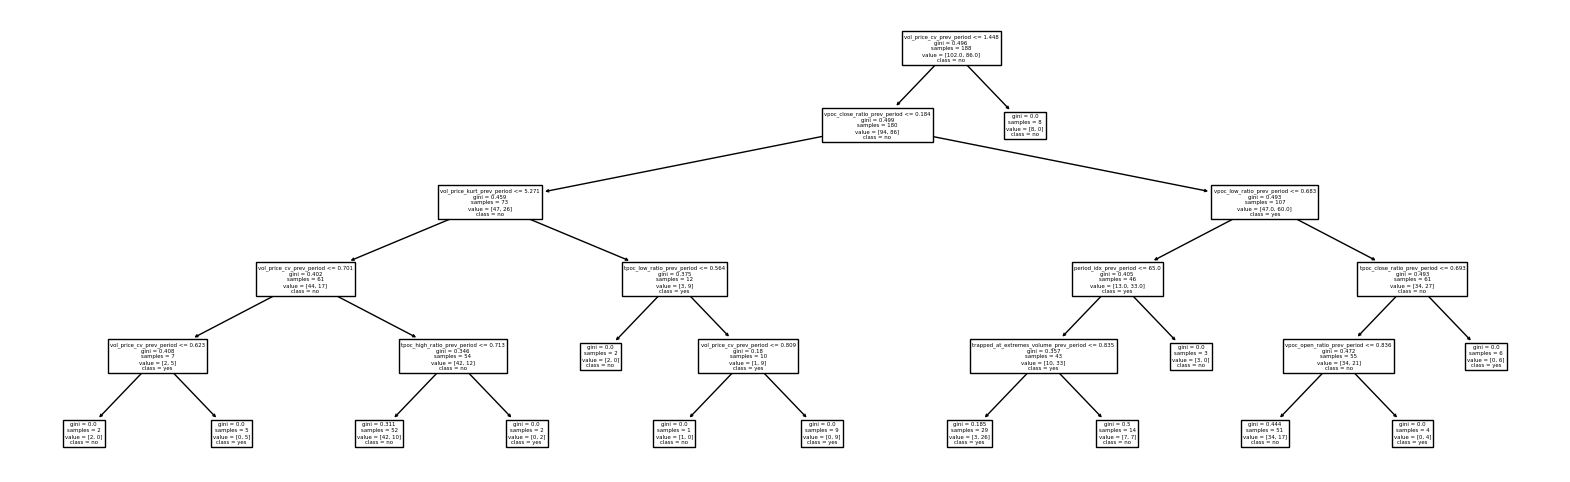

In [13]:
plt.figure(figsize=(20,6))
plot_tree(model, feature_names=xtrain_longs.columns, class_names=['no','yes'])
plt.show()

In [14]:
model = DecisionTreeClassifier(random_state=1, max_depth=5).fit(xtrain_shorts, ytrain_shorts)

print("Train")
c = 0.5
y_probs = model.predict_proba(xtrain_shorts)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_shorts.values, y_pred)}')
print(classification_report(ytrain_shorts.values, y_pred))
print(confusion_matrix(ytrain_shorts.values, y_pred))
print("Test")
y_probs = model.predict_proba(xtest_shorts)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytest_shorts.values, y_pred)}')
print(classification_report(ytest_shorts.values, y_pred))
print(confusion_matrix(ytest_shorts.values, y_pred))

Train
AUC: 0.6712841386554622
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        64
           1       0.74      0.98      0.84       119

    accuracy                           0.77       183
   macro avg       0.83      0.67      0.68       183
weighted avg       0.80      0.77      0.73       183

[[ 23  41]
 [  2 117]]
Test
AUC: 0.5083333333333333
              precision    recall  f1-score   support

           0       0.36      0.25      0.30        16
           1       0.66      0.77      0.71        30

    accuracy                           0.59        46
   macro avg       0.51      0.51      0.50        46
weighted avg       0.56      0.59      0.56        46

[[ 4 12]
 [ 7 23]]


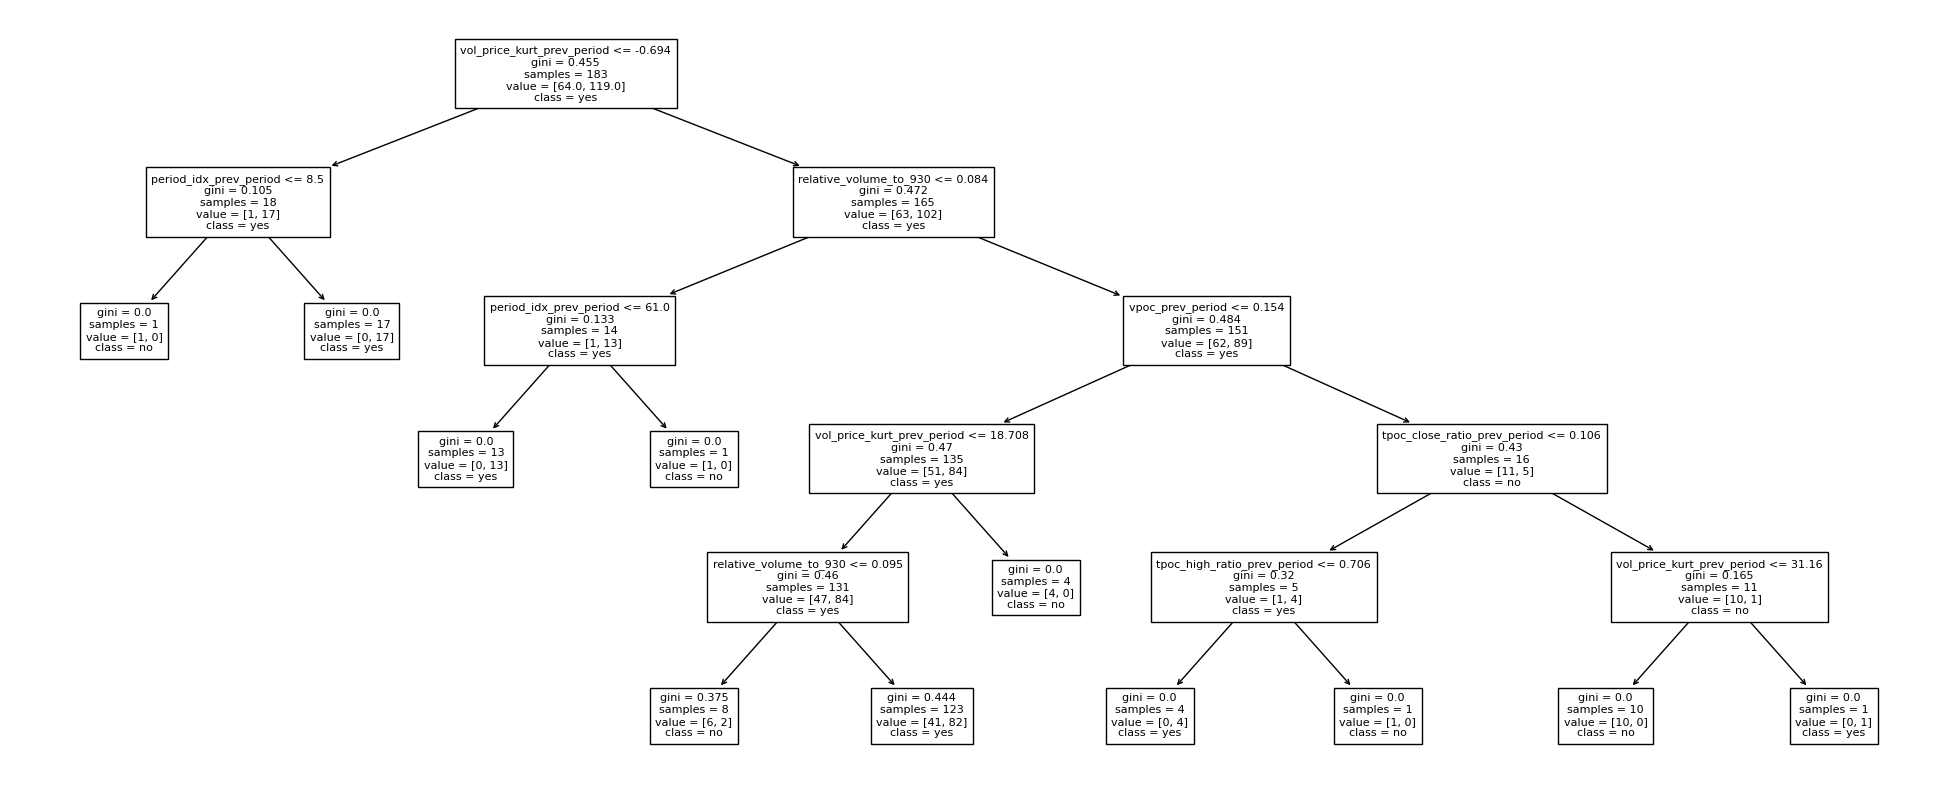

In [15]:
plt.figure(figsize=(25,10))
plot_tree(model, feature_names=xtrain_shorts.columns, class_names=['no','yes'],fontsize=8)
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

xtrain_longs, xtest_longs, ytrain_longs, ytest_longs = train_test_split(trapped_longs[features],trapped_longs[target], random_state=1, train_size=0.7, stratify=trapped_longs[target], shuffle=True)
xtrain_shorts, xtest_shorts, ytrain_shorts, ytest_shorts = train_test_split(trapped_shorts[features],trapped_shorts[target], random_state=1, train_size=0.7, stratify=trapped_shorts[target], shuffle=True)

param_grid = [
  {'max_depth': [3, 5, 7, 10, 12, 15, None], 'class_weight': [None, 'balanced'], 'min_impurity_decrease': [0,0.1,0.2,0.3,0.4], 'min_samples_split': [2,4,6,8,10], 'min_samples_leaf': [1, 3, 5, 7, 10]},
]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [8]:
import xgboost as xgb

In [9]:
trapped_shorts_train_val = trapped_shorts.loc[:"2024-05-06 9:30:00"]
trapped_longs_train_val = trapped_longs.loc[:"2024-05-06 9:30:00"]

trapped_shorts_test = trapped_shorts.loc["2024-05-06 9:30:00":]
trapped_longs_test = trapped_longs.loc["2024-05-06 9:30:00":]

In [10]:
trapped_longs_train_val.index.intersection(trapped_longs_test.index), trapped_shorts_train_val.index.intersection(trapped_shorts_test.index)

(DatetimeIndex([], dtype='datetime64[ns]', name='period', freq=None),
 DatetimeIndex([], dtype='datetime64[ns]', name='period', freq=None))

In [11]:
features

['movement_prev_period',
 'chg_prev_period',
 'vpoc_prev_period',
 'vpoc_tpoc_ratio_prev_period',
 'vpoc_open_ratio_prev_period',
 'tpoc_open_ratio_prev_period',
 'vpoc_high_ratio_prev_period',
 'tpoc_high_ratio_prev_period',
 'vpoc_low_ratio_prev_period',
 'tpoc_low_ratio_prev_period',
 'vpoc_close_ratio_prev_period',
 'tpoc_close_ratio_prev_period',
 'price_cv_prev_period',
 'price_skew_prev_period',
 'price_kurt_prev_period',
 'vol_price_cv_prev_period',
 'vol_price_skew_prev_period',
 'vol_price_kurt_prev_period',
 'trapped_at_extremes_volume_prev_period',
 'period_idx_prev_period',
 'relative_volume_to_930',
 'relative_volume_prev_period']

In [12]:
trapped_longs_train_val[features].columns.shape[0] == len(features), trapped_shorts_train_val[features].columns.shape[0] == len(features)

(True, True)

In [13]:
xtrain_longs, xval_longs, ytrain_longs, yval_longs = train_test_split(trapped_longs_train_val[features],trapped_longs_train_val[target], random_state=1, train_size=0.7, stratify=trapped_longs_train_val[target], shuffle=True)

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['learning_rate'] = 0.1
param['n_estimators'] = 5000
param['early_stopping_rounds'] = 100
# param['gamma'] = 0
param['reg_alpha'] = 0.0
param['reg_lambda'] = 0.1
param['max_depth'] = 5
param['min_child_weight'] = 4
param['max_delta_step'] = 0
param['subsample'] = 0.7
param['colsample_bytree'] = 1
param['seed'] = 0
# param['base_score'] = ytrain_longs.mean()
param['base_score'] = 0.5
param['n_jobs'] = -1
# param['verbosity'] = 3


trapped_longs_model = xgb.XGBClassifier().set_params(**param)

trapped_longs_model = trapped_longs_model.fit(xtrain_longs.values, ytrain_longs.values, eval_set=[(xval_longs.values, yval_longs.values)])

print("Train")
# c = ytrain_longs.mean()
c = 0.5
y_probs = trapped_longs_model.predict_proba(xtrain_longs.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_longs.values, y_pred)}')
print(classification_report(ytrain_longs.values, y_pred))
print(confusion_matrix(ytrain_longs, y_pred))
print("Val")
y_probs = trapped_longs_model.predict_proba(xval_longs.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(yval_longs.values, y_pred)}')
print(classification_report(yval_longs.values, y_pred))
print(confusion_matrix(yval_longs.values, y_pred))
print("Test")
y_probs = trapped_longs_model.predict_proba(trapped_longs_test[features].values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(trapped_longs_test[target].values, y_pred)}')
print(classification_report(trapped_longs_test[target].values, y_pred))
print(confusion_matrix(trapped_longs_test[target].values, y_pred))
print(f"threshold: {c}")

[0]	validation_0-auc:0.50275
[1]	validation_0-auc:0.56868
[2]	validation_0-auc:0.52381
[3]	validation_0-auc:0.50366
[4]	validation_0-auc:0.45971
[5]	validation_0-auc:0.46978
[6]	validation_0-auc:0.47436
[7]	validation_0-auc:0.46337
[8]	validation_0-auc:0.45604
[9]	validation_0-auc:0.43407
[10]	validation_0-auc:0.44139
[11]	validation_0-auc:0.47985
[12]	validation_0-auc:0.47802
[13]	validation_0-auc:0.46337
[14]	validation_0-auc:0.43773
[15]	validation_0-auc:0.44322
[16]	validation_0-auc:0.44505
[17]	validation_0-auc:0.44139
[18]	validation_0-auc:0.42125
[19]	validation_0-auc:0.42857
[20]	validation_0-auc:0.45421
[21]	validation_0-auc:0.43590
[22]	validation_0-auc:0.42308
[23]	validation_0-auc:0.43040
[24]	validation_0-auc:0.45055
[25]	validation_0-auc:0.44689
[26]	validation_0-auc:0.45055
[27]	validation_0-auc:0.45971
[28]	validation_0-auc:0.43223
[29]	validation_0-auc:0.43407
[30]	validation_0-auc:0.44139
[31]	validation_0-auc:0.44139
[32]	validation_0-auc:0.43956
[33]	validation_0-au

In [14]:
xtrain_shorts, xval_shorts, ytrain_shorts, yval_shorts = train_test_split(trapped_shorts_train_val[features],trapped_shorts_train_val[target], random_state=1, train_size=0.6, stratify=trapped_shorts_train_val[target], shuffle=True)

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['learning_rate'] = 0.3
param['n_estimators'] = 5000
param['early_stopping_rounds'] = 100
# param['gamma'] = 0
param['reg_alpha'] = 0.0
param['reg_lambda'] = 0.1
param['max_depth'] = 5
param['min_child_weight'] = 4
param['max_delta_step'] = 0
param['subsample'] = 1
param['colsample_bytree'] = 1
param['seed'] = 0
# param['base_score'] = ytrain_shorts.mean()
param['base_score'] = 0.5
param['n_jobs'] = -1
# param['verbosity'] = 3


trapped_shorts_model = xgb.XGBClassifier().set_params(**param)

trapped_shorts_model = trapped_shorts_model.fit(xtrain_shorts.values, ytrain_shorts.values, eval_set=[(xval_shorts.values, yval_shorts.values)])

# c = ytrain_shorts.mean()
c = 0.6
print("Train")
y_probs = trapped_shorts_model.predict_proba(xtrain_shorts.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(ytrain_shorts.values, y_pred)}')
print(classification_report(ytrain_shorts.values, y_pred))
print(confusion_matrix(ytrain_shorts, y_pred))

print("Val")
y_probs = trapped_shorts_model.predict_proba(xval_shorts.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(yval_shorts.values, y_pred)}')
print(classification_report(yval_shorts.values, y_pred))
print(confusion_matrix(yval_shorts.values, y_pred))

print("Test")
y_probs = trapped_shorts_model.predict_proba(trapped_shorts_test[features].values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(trapped_shorts_test[target].values, y_pred)}')
print(classification_report(trapped_shorts_test[target].values, y_pred))
print(confusion_matrix(trapped_shorts_test[target].values, y_pred))

print(f"threshold: {c}")

[0]	validation_0-auc:0.72970
[1]	validation_0-auc:0.70085
[2]	validation_0-auc:0.68002


[3]	validation_0-auc:0.64850
[4]	validation_0-auc:0.65919
[5]	validation_0-auc:0.61806
[6]	validation_0-auc:0.61699
[7]	validation_0-auc:0.61058
[8]	validation_0-auc:0.62874
[9]	validation_0-auc:0.60043
[10]	validation_0-auc:0.60577
[11]	validation_0-auc:0.62500
[12]	validation_0-auc:0.65812
[13]	validation_0-auc:0.65491
[14]	validation_0-auc:0.65064
[15]	validation_0-auc:0.66026
[16]	validation_0-auc:0.65385
[17]	validation_0-auc:0.63675
[18]	validation_0-auc:0.63996
[19]	validation_0-auc:0.63675
[20]	validation_0-auc:0.63996
[21]	validation_0-auc:0.63355
[22]	validation_0-auc:0.63462
[23]	validation_0-auc:0.63462
[24]	validation_0-auc:0.62179
[25]	validation_0-auc:0.61538
[26]	validation_0-auc:0.61218
[27]	validation_0-auc:0.60577
[28]	validation_0-auc:0.60150
[29]	validation_0-auc:0.60470
[30]	validation_0-auc:0.60256
[31]	validation_0-auc:0.60897
[32]	validation_0-auc:0.59936
[33]	validation_0-auc:0.59829
[34]	validation_0-auc:0.59829
[35]	validation_0-auc:0.59615
[36]	validation_0

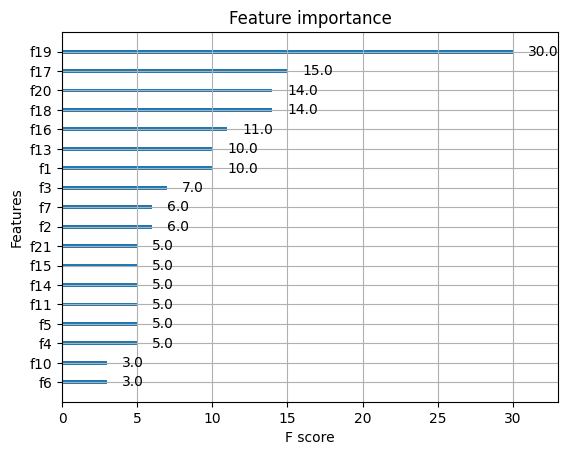

In [15]:
xgb.plot_importance(trapped_shorts_model,)
plt.show()

In [51]:
features[19],features[17],features[20],features[18],features[16],features[13],features[1],features[3],features[7],features[2],features[21],features[15],features[14],features[11],features[5],features[4],features[10],features[6]

('period_idx_prev_period',
 'vol_price_kurt_prev_period',
 'relative_volume_to_930',
 'trapped_at_extremes_volume_prev_period',
 'vol_price_skew_prev_period',
 'price_skew_prev_period',
 'chg_prev_period',
 'vpoc_tpoc_ratio_prev_period',
 'tpoc_high_ratio_prev_period',
 'vpoc_prev_period',
 'relative_volume_prev_period',
 'vol_price_cv_prev_period',
 'price_kurt_prev_period',
 'tpoc_close_ratio_prev_period',
 'tpoc_open_ratio_prev_period',
 'vpoc_open_ratio_prev_period',
 'vpoc_close_ratio_prev_period',
 'vpoc_high_ratio_prev_period')

In [52]:
trapped_shorts_test[y_pred == 1][[target] + features]

,success,movement_prev_period,chg_prev_period,vpoc_prev_period,vpoc_tpoc_ratio_prev_period,vpoc_open_ratio_prev_period,tpoc_open_ratio_prev_period,vpoc_high_ratio_prev_period,tpoc_high_ratio_prev_period,vpoc_low_ratio_prev_period,...,price_cv_prev_period,price_skew_prev_period,price_kurt_prev_period,vol_price_cv_prev_period,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_at_extremes_volume_prev_period,period_idx_prev_period,relative_volume_to_930,relative_volume_prev_period
period,,,,,,,,,,,,,,,,,,,,,
2024-05-06 12:25:00,1,0,-0.0097,0.112870,0.275862,0.379310,0.655172,0.413793,0.689655,0.586207,...,0.0,0.620,-0.462,0.932,1.304,0.778,0.893945,34,0.217297,2.275349
2024-05-06 12:45:00,1,0,-0.0058,0.130230,0.058824,0.235294,0.294118,0.411765,0.470588,0.588235,...,0.0,-0.392,-0.674,0.683,0.139,-0.823,0.738645,38,0.081323,0.444530
2024-05-06 12:55:00,1,0,-0.0156,0.125191,0.000000,0.407407,0.407407,0.518519,0.518519,0.481481,...,0.0,-0.043,-1.070,0.865,1.578,2.563,0.592803,40,0.118766,0.382359
2024-05-06 13:15:00,1,0,-0.0058,0.099366,0.000000,0.428571,0.428571,0.666667,0.666667,0.333333,...,0.0,0.091,-0.662,0.643,0.436,-1.022,0.802855,44,0.121270,0.624872
2024-05-06 13:45:00,1,1,0.0350,0.099191,0.233333,0.233333,0.000000,0.933333,0.700000,0.066667,...,0.0,0.449,-0.811,0.826,1.079,0.384,0.376655,50,0.087268,0.872076
2024-05-07 12:20:00,0,1,0.0251,0.274616,0.000000,0.000000,0.000000,0.714286,0.714286,0.285714,...,0.0,0.260,-1.184,1.380,2.598,8.089,0.381373,33,0.143022,1.437972
2024-05-07 12:25:00,1,1,0.0039,0.278076,0.277778,0.444444,0.722222,0.555556,0.833333,0.444444,...,0.0,0.227,-1.126,1.171,2.960,10.502,0.915389,34,0.083732,0.585449
2024-05-07 12:50:00,0,1,0.0039,0.328174,0.000000,0.000000,0.000000,0.111111,0.111111,0.888889,...,0.0,0.216,-0.919,1.381,3.334,12.559,0.993193,39,0.117943,0.505185
2024-05-07 13:20:00,0,1,0.0212,0.563823,0.000000,0.315789,0.315789,1.000000,1.000000,0.000000,...,0.0,1.003,0.028,2.745,3.374,11.417,0.909495,45,0.581539,6.063553
